# Imports

In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, matthews_corrcoef
from sklearn import preprocessing
from sklearn.utils import resample

from aux import *

import pandas as pd
pd.options.display.max_columns = 100

seed = 1997

# Lectura de datos

In [77]:
# Leemos la base de datos
col_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
for i in range(1,5):
    col_names.append('Wilderness_Area_' + str(i))
for i in range(1,41):
    col_names.append('Soil_Type_' + str(i))
col_names.append('Cover_Type')

dataset = pd.read_csv('covtype.data', header=None, names=col_names)

In [70]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [78]:
X = dataset.drop('Cover_Type', axis=1)
y = dataset['Cover_Type']
y.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

# Train, test, val split

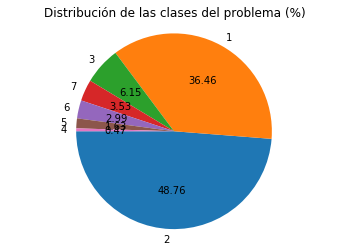

In [50]:
# Distribucion de las clases 
prop_class = y.value_counts(normalize=True)
pieLabels = ['2','1','3','7','6','5','4']
figureObject, axesObject = plt.subplots()
axesObject.pie(prop_class*100, labels=pieLabels, autopct='%1.2f', startangle=180)
axesObject.axis('equal')
plt.title("Distribución de las clases del problema (%)")
plt.show()

Separamos en train, vail y test.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=50000, stratify=y, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=25000, stratify=y_train, random_state=seed)

Número de elementos de cada clase en `train`.

Undersampling

In [73]:
def split(dataset, sizes=[]):
    df_train = []
    df_test = []
    for i in range(1,8):
        df = dataset.loc[dataset['Cover_Type'] == i].sample(sizes[i-1], random_state=1997)
        df_train.append(df)
        df_test.append(df)

    train = pd.concat(df_train)
    test = pd.concat(df_test)

    X_train = train.drop('Cover_Type', axis=1)
    y_train = train['Cover_Type']
    X_test = test.drop('Cover_Type', axis=1)
    y_test = test['Cover_Type']
    
    return X_train, X_test, y_train, y_test

In [88]:
X_train, X_test, y_train, y_test = split(dataset, [6000, 6000, 1539, 118, 408, 748, 882])

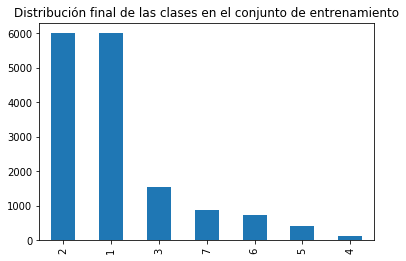

In [89]:
y_train.value_counts().plot(kind='bar', title='Distribución final de las clases en el conjunto de entrenamiento');

# Preprocesado

Definimos un `Pipeline` de preprocesado.

In [92]:
data_preprocess = Pipeline(
    [
        ("VT", VarianceThreshold()),
        ("Scaler", StandardScaler()),
        #("PCA", PCA(0.95)),
        #("Scaler2", StandardScaler()),
    ]
)

Preprocesamos el conjunto de entrenamiento y mostramos la matriz de correlación antes y después.

In [93]:
X_train_new = data_preprocess.fit_transform(X_train, y_train)
print(X_train.shape)
print(X_train_new.shape)
# se elimina el atributo Soil_Type_15 que tiene varianza 0

(15695, 54)
(15695, 53)


Matriz de correlación pre y post procesado (dígitos)


/home/pabloac31/anaconda3/envs/AA/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/pabloac31/anaconda3/envs/AA/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


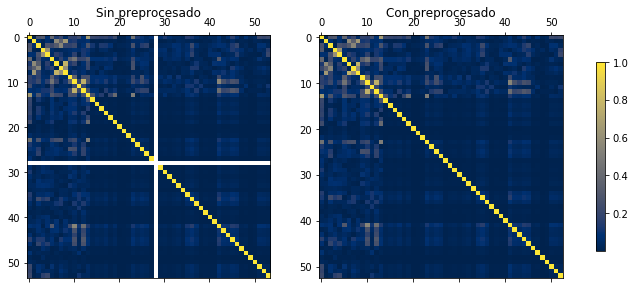

In [58]:
show_preprocess_correlation_matrix(X_train, X_train_new)

Preprocesamos validación y `test`.

In [94]:
X_train = X_train_new
X_val = data_preprocess.transform(X_val)
X_test = data_preprocess.transform(X_test)

# Modelos a considerar

Definimos un array con los modelos que vamos a considerar, se entrenarán y evaluarán en validación.

In [95]:
scorer = make_scorer(f1_score, average = "weighted")
#scorer = make_scorer(f1_score, average = "micro")

In [61]:
reg_values_lin = [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 100, 1000]
reg_values_svm = [1, 100, 250, 500, 750, 1000, 1250]

In [64]:
linear_models = []
linear_models += [
    (
        "Perceptron: \u03B1={}".format(a),
        Perceptron(alpha=a, penalty="l2", class_weight='balanced', random_state=seed, n_jobs=-1),
    )
    for a in reg_values_lin
]
linear_models += [
    (
        "RidgeClassifier: \u03B1={}".format(a),
        RidgeClassifier(alpha=a, random_state=seed, class_weight='balanced', max_iter=1000),
    )
    for a in reg_values_lin
]
linear_models += [
    (
        "Logistic regresion: C={}".format(c),
        LogisticRegression(
            C=c, multi_class="ovr", penalty="l2", solver='saga', class_weight='balanced', random_state=seed, n_jobs=-1
        ),
    )
    for c in reg_values_lin
]
linear_models += [
    (
        "SGD Classifier: \u03B1={}".format(a),
        SGDClassifier(alpha=a, class_weight='balanced', random_state=seed, n_jobs=-1)
    )
    for a in reg_values_lin
]

In [66]:
svm_models = []
svm_models += [
    (
        "SVM (3-poly): C={}".format(c),
        SVC(C = c, kernel='poly', degree=3)
    )
    for c in reg_values_svm
]
svm_models += [
    (
        "SVM (5-poly): C={}".format(c),
        SVC(C = c, kernel='poly', degree=5)
    )
    for c in reg_values_svm
]
svm_models += [
    (
        "SVM (rbf): C={}".format(c),
        SVC(C = c, kernel='rbf')
    )
    for c in reg_values_svm
]

In [96]:
rf_models = []
rf_models += [
    (
        "Random Forest: {} estimators, 1000 samples".format(n),
        RandomForestClassifier(n_estimators=n, max_samples=1000, class_weight="balanced", n_jobs=-1, random_state=seed)
    )
    for n in [100,500]
]
rf_models += [
    (
        "Random Forest: {} estimators".format(n),
        RandomForestClassifier(n_estimators=n, class_weight="balanced", n_jobs=-1, random_state=seed)
    )
    for n in [100,200]
]

# Elección de modelo

Hacemos `K-fold cross-validation` sobre cada uno de los conjuntos de modelos: lineal, knn y SVM. Y seleccionamos el mejor de cada uno.

In [65]:
best_linear = kfold_models(linear_models, X_train, y_train, seed, 
                           scorer, stratified=False, verbose=True)

Los modelos que se van a considerar son: 
	 Perceptron: α=0.001
	 Perceptron: α=0.01
	 Perceptron: α=0.1
	 Perceptron: α=0.5
	 Perceptron: α=1
	 Perceptron: α=2
	 Perceptron: α=5
	 Perceptron: α=10
	 Perceptron: α=100
	 Perceptron: α=1000
	 RidgeClassifier: α=0.001
	 RidgeClassifier: α=0.01
	 RidgeClassifier: α=0.1
	 RidgeClassifier: α=0.5
	 RidgeClassifier: α=1
	 RidgeClassifier: α=2
	 RidgeClassifier: α=5
	 RidgeClassifier: α=10
	 RidgeClassifier: α=100
	 RidgeClassifier: α=1000
	 Logistic regresion: C=0.001
	 Logistic regresion: C=0.01
	 Logistic regresion: C=0.1
	 Logistic regresion: C=0.5
	 Logistic regresion: C=1
	 Logistic regresion: C=2
	 Logistic regresion: C=5
	 Logistic regresion: C=10
	 Logistic regresion: C=100
	 Logistic regresion: C=1000
	 SGD Classifier: α=0.001
	 SGD Classifier: α=0.01
	 SGD Classifier: α=0.1
	 SGD Classifier: α=0.5
	 SGD Classifier: α=1
	 SGD Classifier: α=2
	 SGD Classifier: α=5
	 SGD Classifier: α=10
	 SGD Classifier: α=100
	 SGD Classifier: α=1000


In [67]:
best_svm = kfold_models(svm_models, X_train, y_train, seed, scorer,
                        stratified=False, verbose=True)

Los modelos que se van a considerar son: 
	 SVM (3-poly): C=1
	 SVM (3-poly): C=100
	 SVM (3-poly): C=250
	 SVM (3-poly): C=500
	 SVM (3-poly): C=750
	 SVM (3-poly): C=1000
	 SVM (3-poly): C=1250
	 SVM (5-poly): C=1
	 SVM (5-poly): C=100
	 SVM (5-poly): C=250
	 SVM (5-poly): C=500
	 SVM (5-poly): C=750
	 SVM (5-poly): C=1000
	 SVM (5-poly): C=1250
	 SVM (rbf): C=1
	 SVM (rbf): C=100
	 SVM (rbf): C=250
	 SVM (rbf): C=500
	 SVM (rbf): C=750
	 SVM (rbf): C=1000
	 SVM (rbf): C=1250


--> SVM (3-poly): C=1 <--
Score en K-fold: 0.714


--> SVM (3-poly): C=100 <--


/home/pabloac31/anaconda3/envs/AA/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Score en K-fold: 0.777


--> SVM (3-poly): C=250 <--
Score en K-fold: 0.782


--> SVM (3-poly): C=500 <--
Score en K-fold: 0.783


--> SVM (3-poly): C=750 <--


KeyboardInterrupt: 

In [97]:
best_rf = kfold_models(rf_models, X_train, y_train, seed, scorer,
                        stratified=True, verbose=True)

Los modelos que se van a considerar son: 
	 Random Forest: 100 estimators, 1000 samples
	 Random Forest: 500 estimators, 1000 samples
	 Random Forest: 100 estimators
	 Random Forest: 200 estimators


--> Random Forest: 100 estimators, 1000 samples <--
Score en K-fold: 0.722


--> Random Forest: 500 estimators, 1000 samples <--
Score en K-fold: 0.729


--> Random Forest: 100 estimators <--
Score en K-fold: 0.817


--> Random Forest: 200 estimators <--
Score en K-fold: 0.818



Mejor modelo: RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=1997)


Entrenamos y evaluamos cada modelo en el conjunto de validación, quedandonos con el mejor de ellos en `best_model`.

In [116]:
best_model = 0
best_model_score = 0

models = [best_linear, best_svm, best_rf]

for model in models:
    print(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    val_score = f1_score(y_val, y_pred, average='weighted')
    print("Validation Score: ", val_score)
    if best_model_score < val_score:
        best_model_score = val_score
        best_model = model

LogisticRegression(C=5, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   random_state=1997, solver='saga')


/home/pabloac31/anaconda3/envs/AA/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/pabloac31/anaconda3/envs/AA/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/pabloac31/anaconda3/envs/AA/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/pabloac31/anaconda3/envs/AA/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Validation Score:  0.652888600055249
SVC(C=500)
Validation Score:  0.7792293994413523
RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=1997)
Validation Score:  0.811343723715531


El mejor modelo ha resultado:

In [117]:
print(best_model)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=1997)


# Predicción

Predecimos los valores de `test` con dicho modelo.

In [25]:
y_pred = best_model.predict(X_test)
print("F1-score obtenido: {:.2f}".format(f1_score(y_test, y_pred, average='weighted')))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Mostramos la curva de aprendizaje obtenida por el modelo de la siguiente forma, empezamos tomando el $10\%$ del conjunto de `train` y hacemos `cross-validation` con dicho conjunto, repetimos el proceso aumentando el porcentage del conjunto utilizado hasta llegar al $100\%$.

<module 'matplotlib.pyplot' from '/home/pabloac31/anaconda3/envs/AA/lib/python3.7/site-packages/matplotlib/pyplot.py'>

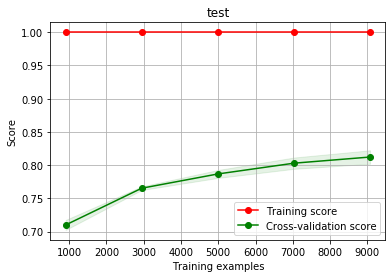

In [119]:
plot_learning_curve(best_model, "test", X_train, y_train)

Mostramos la matriz de confusión de los datos

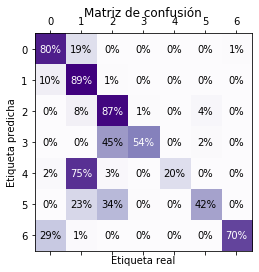

In [120]:
"""Muestra matriz de confusión de la base de datos de dígitos."""
show_confusion_matrix(y_test, y_pred, 7)

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.80      0.82    206327
           2       0.82      0.89      0.85    275928
           3       0.75      0.87      0.81     34824
           4       0.81      0.54      0.65      2676
           5       0.87      0.20      0.32      9246
           6       0.76      0.42      0.54     16915
           7       0.90      0.70      0.79     19976

    accuracy                           0.82    565892
   macro avg       0.82      0.63      0.68    565892
weighted avg       0.82      0.82      0.82    565892



In [122]:
y_test.value_counts()

2    275928
1    206327
3     34824
7     19976
6     16915
5      9246
4      2676
Name: Cover_Type, dtype: int64

# Prueba ensemble

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100000, stratify=y, random_state=seed)

In [123]:
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier

In [124]:
ec = BalancedRandomForestClassifier(n_estimators=1000, sampling_strategy='not minority', class_weight='balanced', random_state=seed, n_jobs=-1)
ec.fit(X_train, y_train) 

BalancedRandomForestClassifier(class_weight='balanced', n_estimators=1000,
                               n_jobs=-1, random_state=1997,
                               sampling_strategy='not minority')

In [70]:
y_pred = ec.predict(X_test)